<a href="https://colab.research.google.com/github/nabin010/Assignment1/blob/main/Nabin_Dangal_2417484.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Assignment1

/content/drive/MyDrive/Assignment1


In [ ]:
import pandas as pd

data = pd.read_csv("WHR-2024-5CS037.csv")
print(data.head(10))


  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

In [ ]:
rows, columns = data.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 143, Number of columns: 9


In [ ]:
print(data.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [ ]:
mean_score = data["score"].mean()
median_score = data["score"].median()
std_score = data["score"].std()

print(f"Mean: {mean_score}, Median: {median_score}, Standard Deviation: {std_score}")

Mean: 5.52758041958042, Median: 5.785, Standard Deviation: 1.1707165099442995


In [ ]:
highest_score_country = data.loc[data["score"].idxmax(), "Country name"]
lowest_score_country = data.loc[data["score"].idxmin(), "Country name"]

print(f"Country with highest score: {highest_score_country}")
print(f"Country with lowest score: {lowest_score_country}")


Country with highest score: Finland
Country with lowest score: Afghanistan


In [ ]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
filtered_data = data[data["score"] > 7.5]
print(filtered_data)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [ ]:
sorted_filtered_data = filtered_data.sort_values(by="Log GDP per capita", ascending=False)
print(sorted_filtered_data.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [ ]:
def categorize_happiness(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"
data["Happiness Category"] = data["score"].apply(categorize_happiness)

print(data[["Country name", "score", "Happiness Category"]].head())


  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


<ipython-input-16-13fe52074046>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="score", y="Country name", data=top_10_happiest, palette="viridis")


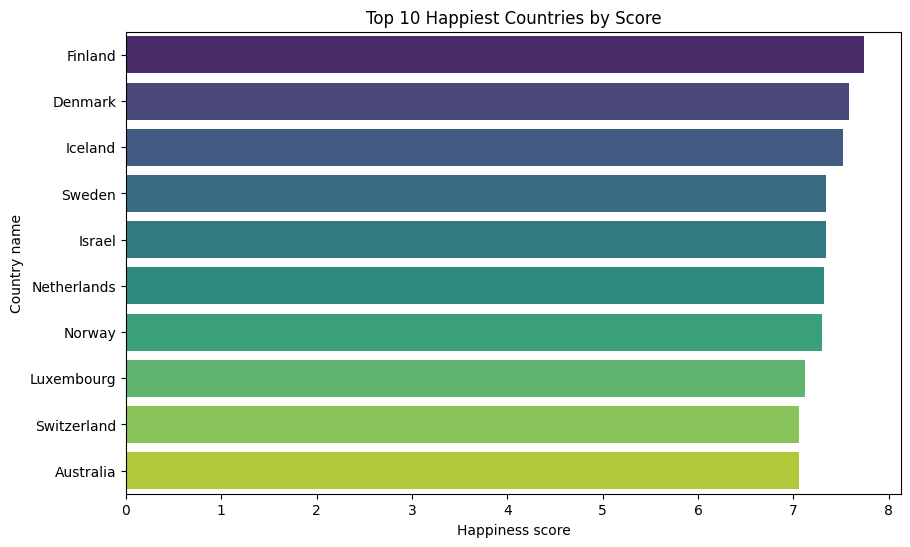

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_happiest = data.nlargest(10, "score")

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="score", y="Country name", data=top_10_happiest, palette="viridis")
plt.title("Top 10 Happiest Countries by Score")
plt.xlabel("Happiness score")
plt.ylabel("Country name")
plt.show()


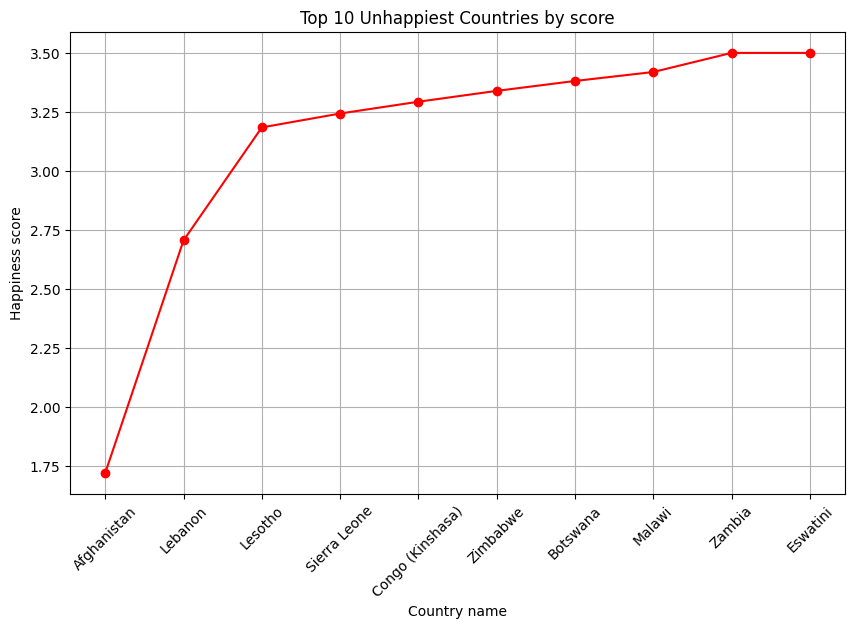

In [ ]:
# Get the top 10 unhappiest countries
top_10_unhappiest = data.nsmallest(10, "score")

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest["Country name"], top_10_unhappiest["score"], marker='o', linestyle='-', color='red')
plt.title("Top 10 Unhappiest Countries by score")
plt.xlabel("Country name")
plt.ylabel("Happiness score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


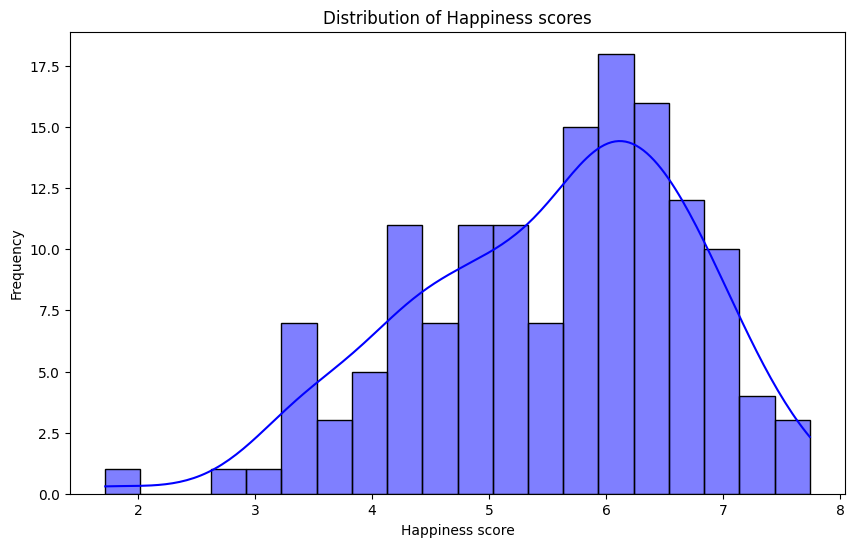

In [ ]:
# Plot a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data["score"], bins=20, kde=True, color="blue")
plt.title("Distribution of Happiness scores")
plt.xlabel("Happiness score")
plt.ylabel("Frequency")
plt.show()

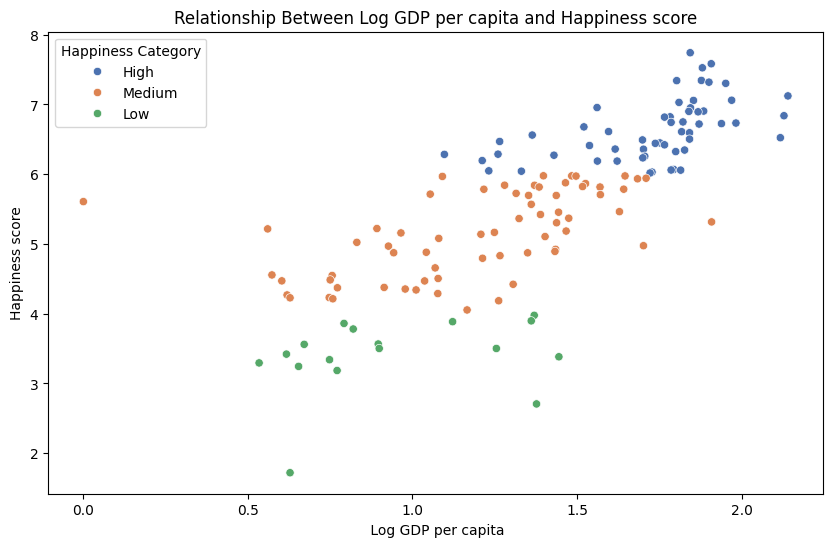

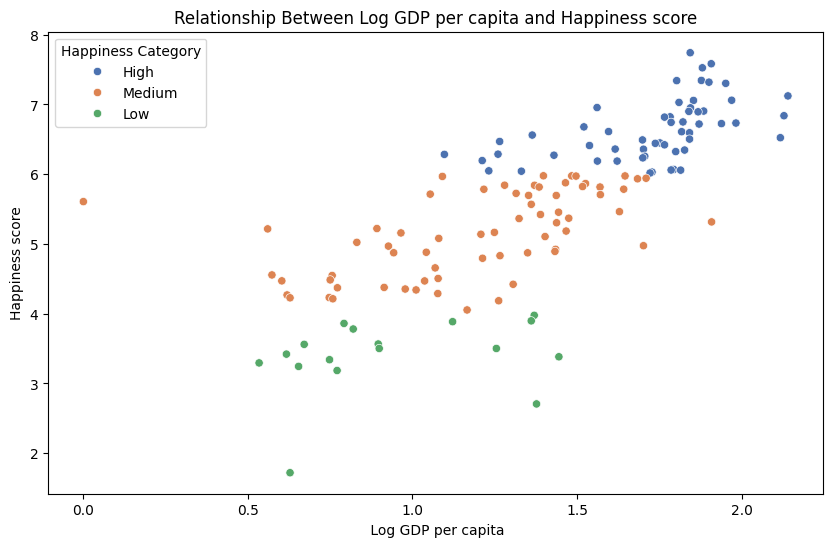

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your previous code to load and process data)

# Create the 'Happiness Category' column before using it in the scatter plot
def categorize_happiness(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

data["Happiness Category"] = data["score"].apply(categorize_happiness)

# Plot a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Log GDP per capita", y="score", data=data, hue="Happiness Category", palette="deep")
plt.title("Relationship Between Log GDP per capita and Happiness score")
plt.xlabel(" Log GDP per capita")
plt.ylabel("Happiness score")
plt.legend(title="Happiness Category")
plt.show()

# Plot a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Log GDP per capita", y="score", data=data, hue="Happiness Category", palette="deep")
plt.title("Relationship Between Log GDP per capita and Happiness score")
plt.xlabel(" Log GDP per capita")
plt.ylabel("Happiness score")
plt.legend(title="Happiness Category")
plt.show()


In [ ]:
# List of South Asian countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan",
    "India", "Maldives", "Nepal",
    "Pakistan", "Srilanka"
]

In [ ]:
# Filter the dataset
south_asia_data = data[data["Country name"].isin(south_asian_countries)]

# Display the filtered dataset
print(south_asia_data)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
107                      0.074

In [ ]:
# Save the filtered dataset to a CSV file
south_asia_data.to_csv("south_asia_happiness_data.csv", index=False)
print("Filtered dataset saved as 'south_asia_happiness_data.csv'")

Filtered dataset saved as 'south_asia_happiness_data.csv'


In [ ]:
# Create the Composite Score column
south_asia_data["Composite score"] = (
    0.40 * south_asia_data["Log GDP per capita"] +
    0.30 * south_asia_data["Social support"] +
    0.30 * south_asia_data["Healthy life expectancy"]
)


<ipython-input-26-5de6a7f8d1ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data["Composite score"] = (


In [ ]:
# Rank the countries based on Composite Score in descending order
south_asia_data = south_asia_data.sort_values(by="Composite score", ascending=False)

# Display the ranked data
print(south_asia_data[["Country name", "Composite score"]])


    Country name  Composite score
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-28-ecae2b365e58>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Composite score", y="Country name", data=top_5_countries, palette="Blues_r")


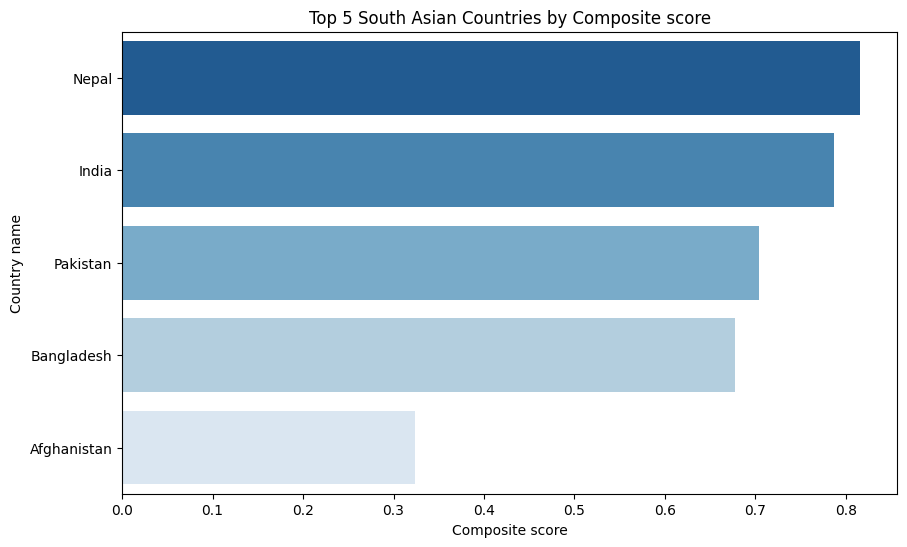

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 countries
top_5_countries = south_asia_data.head(5)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Composite score", y="Country name", data=top_5_countries, palette="Blues_r")
plt.title("Top 5 South Asian Countries by Composite score")
plt.xlabel("Composite score")
plt.ylabel("Country name")
plt.show()


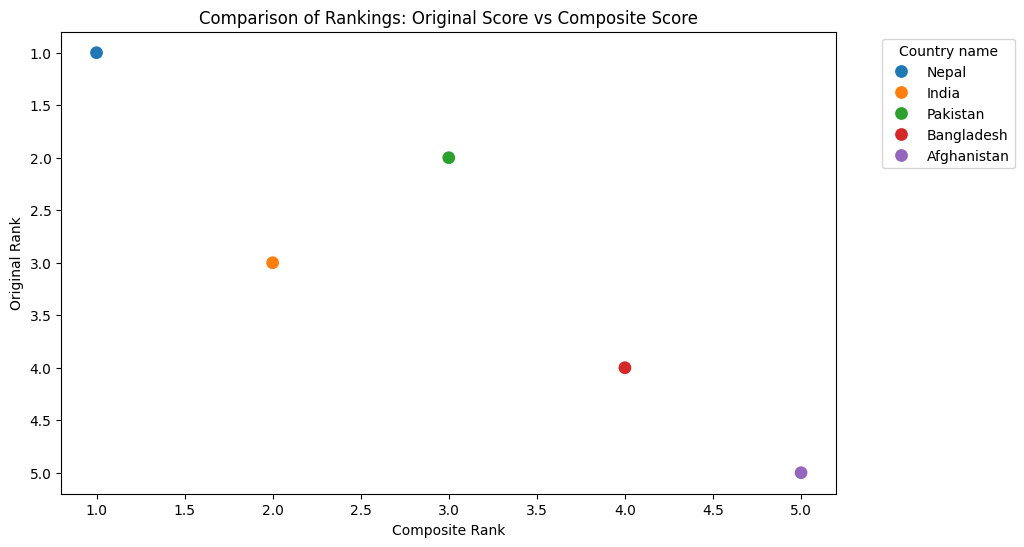

In [ ]:
# Add a ranking based on the original Score
south_asia_data["Original Rank"] = south_asia_data["score"].rank(ascending=False)

# Add a ranking based on the Composite Score
south_asia_data["Composite Rank"] = south_asia_data["Composite score"].rank(ascending=False)

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Composite Rank", y="Original Rank", data=south_asia_data,
    hue="Country name", palette="tab10", s=100
)
plt.title("Comparison of Rankings: Original Score vs Composite Score")
plt.xlabel("Composite Rank")
plt.ylabel("Original Rank")
plt.gca().invert_yaxis()
plt.legend(title="Country name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
def identify_outliers(column):
    Q1 = south_asia_data[column].quantile(0.25)
    Q3 = south_asia_data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (south_asia_data[column] < lower_bound) | (south_asia_data[column] > upper_bound)


In [ ]:
south_asia_data["score Outlier"] = identify_outliers("score")
south_asia_data["GDP Outlier"] = identify_outliers("Log GDP per capita")

# Combine the outlier flags
south_asia_data["Outlier"] = south_asia_data["score Outlier"] | south_asia_data["GDP Outlier"]

# Display the outliers
outliers = south_asia_data[south_asia_data["Outlier"]]
print("Outlier Countries:")
print(outliers[["Country name", "score", "Log GDP per capita"]])


Outlier Countries:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


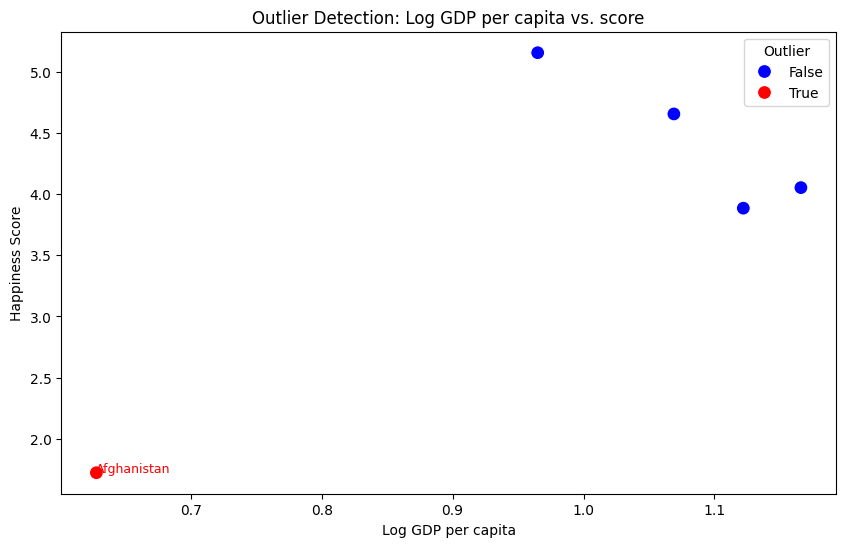

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with outliers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Log GDP per capita", y="score", data=south_asia_data,
    hue="Outlier", palette={False: "blue", True: "red"}, s=100
)

for i, row in outliers.iterrows():
    plt.text(row["Log GDP per capita"], row["score"], row["Country name"], color="red", fontsize=9)

plt.title("Outlier Detection: Log GDP per capita vs. score")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness Score")
plt.legend(title="Outlier")
plt.show()


In [ ]:
# Calculate Pearson correlation
freedom_corr = south_asia_data["Freedom to make life choices"].corr(south_asia_data["score"])
generosity_corr = south_asia_data["Generosity"].corr(south_asia_data["score"])

# Display correlations
print(f"Correlation between Freedom to make life choices and score: {freedom_corr:.2f}")
print(f"Correlation between Generosity and score: {generosity_corr:.2f}")


Correlation between Freedom to make life choices and score: 0.80
Correlation between Generosity and score: 0.88


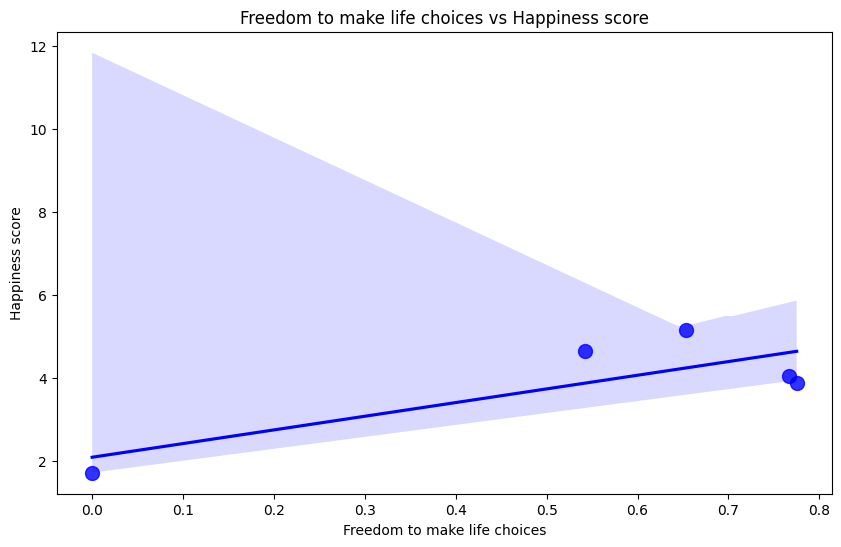

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with trendline
plt.figure(figsize=(10, 6))
sns.regplot(
    x="Freedom to make life choices", y="score",
    data=south_asia_data, color="blue", scatter_kws={"s": 100}
)
plt.title("Freedom to make life choices vs Happiness score")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness score")
plt.show()


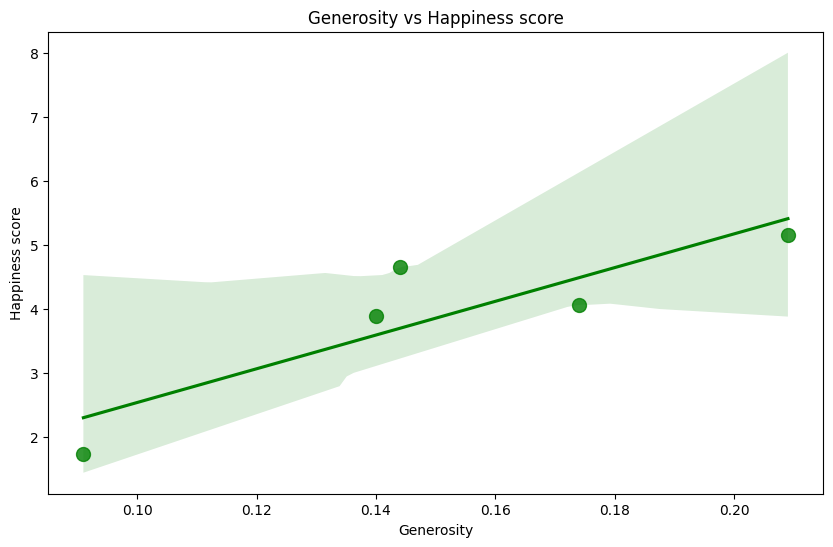

In [ ]:
# Scatter plot with trendline
plt.figure(figsize=(10, 6))
sns.regplot(
    x="Generosity", y="score",
    data=south_asia_data, color="green", scatter_kws={"s": 100}
)
plt.title("Generosity vs Happiness score")
plt.xlabel("Generosity")
plt.ylabel("Happiness score")
plt.show()


In [ ]:
# Create a new column for GDP-Score Gap
south_asia_data["GDP-Score Gap"] = south_asia_data["Log GDP per capita"] - south_asia_data["score"]

# Display the updated dataset
print(south_asia_data[["Country name", "Log GDP per capita", "score", "GDP-Score Gap"]])


    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
125        India               1.166  4.054         -2.888
107     Pakistan               1.069  4.657         -3.588
128   Bangladesh               1.122  3.886         -2.764
142  Afghanistan               0.628  1.721         -1.093


In [ ]:
south_asia_gap_ascending = south_asia_data.sort_values(by="GDP-Score Gap", ascending=True)
print("Countries Ranked by GDP-Score Gap (Ascending):")
print(south_asia_gap_ascending[["Country name", "GDP-Score Gap"]])

Countries Ranked by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
142  Afghanistan         -1.093


In [ ]:
south_asia_gap_descending = south_asia_data.sort_values(by="GDP-Score Gap", ascending=False)
print("Countries Ranked by GDP-Score Gap (Descending):")
print(south_asia_gap_descending[["Country name", "GDP-Score Gap"]])


Countries Ranked by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


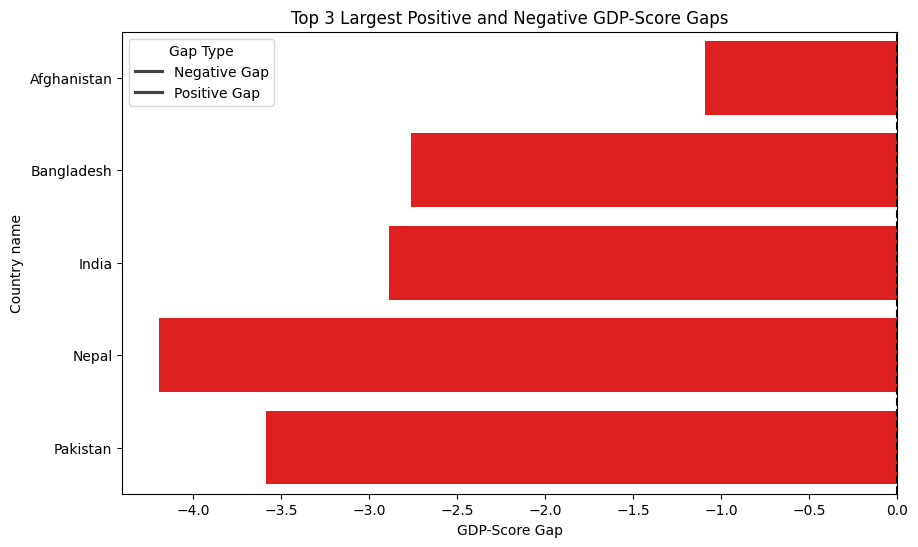

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 3 positive and negative gaps
largest_positive_gaps = south_asia_gap_descending.head(3)
largest_negative_gaps = south_asia_gap_ascending.head(3)

# Combine both for visualization
top_gaps = pd.concat([largest_positive_gaps, largest_negative_gaps])

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x="GDP-Score Gap", y="Country name", data=top_gaps,
    hue=(top_gaps["GDP-Score Gap"] > 0), palette={True: "green", False: "red"}
)
plt.axvline(0, color="black", linestyle="--")
plt.title("Top 3 Largest Positive and Negative GDP-Score Gaps")
plt.xlabel("GDP-Score Gap")
plt.ylabel("Country name")
plt.legend(title="Gap Type", labels=["Negative Gap", "Positive Gap"])
plt.show()


In [ ]:
# List of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

In [ ]:
# Filter the dataset
middle_east_data = data[data["Country name"].isin(middle_east_countries)]

# Display the filtered dataset
print(middle_east_data)


             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661                         0.827 

In [ ]:
# Save the filtered dataset to a CSV file
middle_east_data.to_csv("middle_east_happiness_data.csv", index=False)
print("Filtered dataset saved as 'middle_east_happiness_data.csv'")


Filtered dataset saved as 'middle_east_happiness_data.csv'


In [ ]:
# Mean and standard deviation for South Asia
south_asia_mean = south_asia_data["score"].mean()
south_asia_std = south_asia_data["score"].std()

print(f"South Asia - Mean Happiness Score: {south_asia_mean:.2f}")
print(f"South Asia - Standard Deviation: {south_asia_std:.2f}")


South Asia - Mean Happiness Score: 3.90
South Asia - Standard Deviation: 1.32


In [ ]:
# Mean and standard deviation for Middle East
middle_east_mean = middle_east_data["score"].mean()
middle_east_std = middle_east_data["score"].std()

print(f"Middle East - Mean Happiness Score: {middle_east_mean:.2f}")
print(f"Middle East - Standard Deviation: {middle_east_std:.2f}")


Middle East - Mean Happiness Score: 5.41
Middle East - Standard Deviation: 1.57


In [ ]:
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
elif south_asia_mean < middle_east_mean:
    print("The Middle East has a higher average happiness score.")
else:
    print("Both regions have the same average happiness score.")


The Middle East has a higher average happiness score.


In [ ]:
# Top 3 countries in South Asia by Score
south_asia_top_3 = south_asia_data.nlargest(3, "score")[["Country name", "score"]]

# Bottom 3 countries in South Asia by Score
south_asia_bottom_3 = south_asia_data.nsmallest(3, "score")[["Country name", "score"]]

print("Top 3 Countries in South Asia by Score:")
print(south_asia_top_3)

print("Bottom 3 Countries in South Asia by Score:")
print(south_asia_bottom_3)


Top 3 Countries in South Asia by Score:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
Bottom 3 Countries in South Asia by Score:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
125        India  4.054


In [ ]:
# Top 3 countries in Middle East by Score
middle_east_top_3 = middle_east_data.nlargest(3, "score")[["Country name", "score"]]

# Bottom 3 countries in Middle East by Score
middle_east_bottom_3 = middle_east_data.nsmallest(3, "score")[["Country name", "score"]]

print("Top 3 Countries in Middle East by Score:")
print(middle_east_top_3)

print("Bottom 3 Countries in Middle East by Score:")
print(middle_east_bottom_3)


Top 3 Countries in Middle East by Score:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733
Bottom 3 Countries in Middle East by Score:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


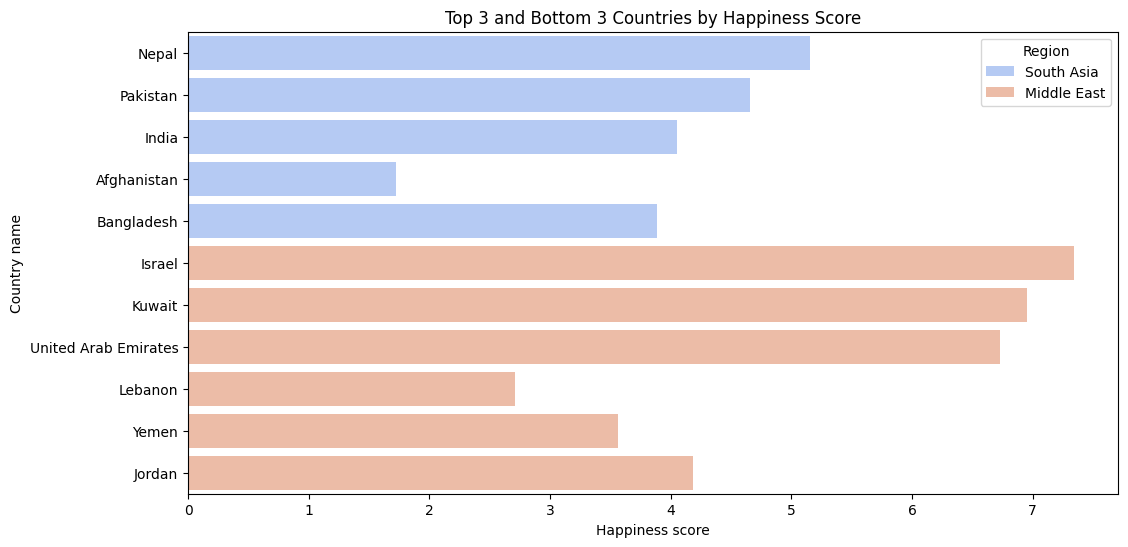

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the top and bottom 3 countries from both regions for comparison
south_asia_combined = pd.concat([south_asia_top_3, south_asia_bottom_3])
south_asia_combined["Region"] = "South Asia"

middle_east_combined = pd.concat([middle_east_top_3, middle_east_bottom_3])
middle_east_combined["Region"] = "Middle East"

# Combine both regions into a single DataFrame
combined_data = pd.concat([south_asia_combined, middle_east_combined])

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x="score", y="Country name", hue="Region", data=combined_data, palette="coolwarm"
)

plt.title("Top 3 and Bottom 3 Countries by Happiness Score")
plt.xlabel("Happiness score")
plt.ylabel("Country name")
plt.legend(title="Region")
plt.show()


In [ ]:
# Calculate mean for each metric in South Asia
south_asia_means = south_asia_data[["Log GDP per capita", "Social support", "Healthy life expectancy"]].mean()

print("Mean Values for South Asia:")
print(south_asia_means)


Mean Values for South Asia:
Log GDP per capita         0.9900
Social support             0.4984
Healthy life expectancy    0.3872
dtype: float64


In [ ]:
# Calculate mean for each metric in Middle East
middle_east_means = middle_east_data[["Log GDP per capita", "Social support", "Healthy life expectancy"]].mean()

print("Mean Values for Middle East:")
print(middle_east_means)


Mean Values for Middle East:
Log GDP per capita         1.496333
Social support             1.152778
Healthy life expectancy    0.554111
dtype: float64


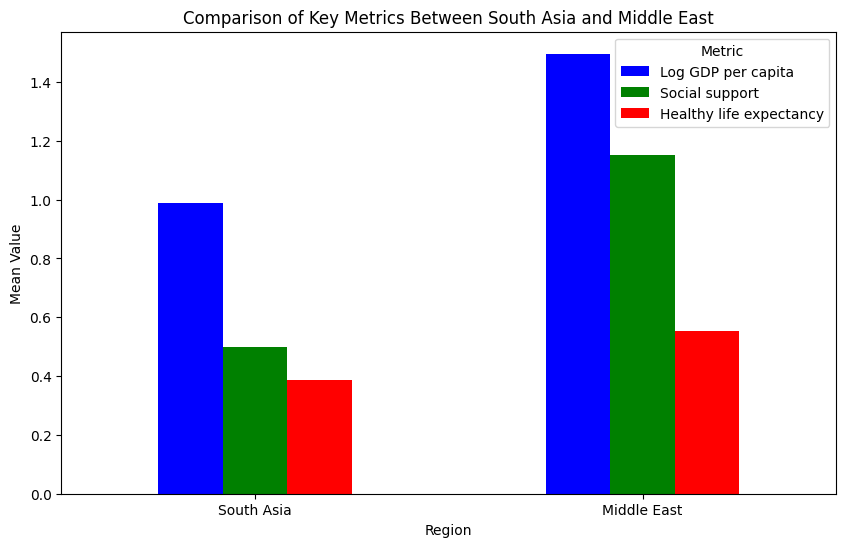

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the mean values of both regions into one DataFrame for easier plotting
comparison_df = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "Log GDP per capita": [south_asia_means["Log GDP per capita"], middle_east_means["Log GDP per capita"]],
    "Social support": [south_asia_means["Social support"], middle_east_means["Social support"]],
    "Healthy life expectancy": [south_asia_means["Healthy life expectancy"], middle_east_means["Healthy life expectancy"]]
})

# Set the region as the index for easier plotting
comparison_df.set_index("Region", inplace=True)

# Plot the grouped bar chart
comparison_df.plot(kind="bar", figsize=(10, 6), color=["blue", "green", "red"])

# Customize the chart
plt.title("Comparison of Key Metrics Between South Asia and Middle East")
plt.ylabel("Mean Value")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.show()


In [ ]:
# Calculate the difference between the mean values of each metric
disparities = abs(south_asia_means - middle_east_means)

print("Disparities Between the Two Regions:")
print(disparities)

# Identify the metric with the largest disparity
largest_disparity_metric = disparities.idxmax()
largest_disparity_value = disparities.max()

print(f"The largest disparity is in {largest_disparity_metric} with a difference of {largest_disparity_value:.2f}")


Disparities Between the Two Regions:
Log GDP per capita         0.506333
Social support             0.654378
Healthy life expectancy    0.166911
dtype: float64
The largest disparity is in Social support with a difference of 0.65


In [ ]:
# Range for South Asia (max - min)
south_asia_range = south_asia_data["score"].max() - south_asia_data["score"].min()

# Coefficient of Variation for South Asia
south_asia_cv = (south_asia_data["score"].std() / south_asia_data["score"].mean()) * 100

print(f"South Asia - Range of Happiness Score: {south_asia_range:.2f}")
print(f"South Asia - Coefficient of Variation (CV): {south_asia_cv:.2f}%")


South Asia - Range of Happiness Score: 3.44
South Asia - Coefficient of Variation (CV): 33.79%


In [ ]:
# Range for Middle East (max - min)
middle_east_range = middle_east_data["score"].max() - middle_east_data["score"].min()

# Coefficient of Variation for Middle East
middle_east_cv = (middle_east_data["score"].std() / middle_east_data["score"].mean()) * 100

print(f"Middle East - Range of Happiness Score: {middle_east_range:.2f}")
print(f"Middle East - Coefficient of Variation (CV): {middle_east_cv:.2f}%")


Middle East - Range of Happiness Score: 4.63
Middle East - Coefficient of Variation (CV): 28.94%


In [ ]:
# Compare which region has greater variability
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness scores.")
elif south_asia_cv < middle_east_cv:
    print("Middle East has greater variability in happiness scores.")
else:
    print("Both regions have the same variability in happiness scores.")


South Asia has greater variability in happiness scores.


In [ ]:
# Calculate correlation for South Asia between Score and other metrics
south_asia_corr_freedom = south_asia_data["score"].corr(south_asia_data["Freedom to make life choices"])
south_asia_corr_generosity = south_asia_data["score"].corr(south_asia_data["Generosity"])

print(f"South Asia - Correlation between Score and Freedom to make life choices: {south_asia_corr_freedom:.2f}")
print(f"South Asia - Correlation between Score and Generosity: {south_asia_corr_generosity:.2f}")


South Asia - Correlation between Score and Freedom to make life choices: 0.80
South Asia - Correlation between Score and Generosity: 0.88


In [ ]:
# Calculate correlation for Middle East between Score and other metrics
middle_east_corr_freedom = middle_east_data["score"].corr(middle_east_data["Freedom to make life choices"])
middle_east_corr_generosity = middle_east_data["score"].corr(middle_east_data["Generosity"])

print(f"Middle East - Correlation between Score and Freedom to make life choices: {middle_east_corr_freedom:.2f}")
print(f"Middle East - Correlation between Score and Generosity: {middle_east_corr_generosity:.2f}")


Middle East - Correlation between Score and Freedom to make life choices: 0.86
Middle East - Correlation between Score and Generosity: 0.63


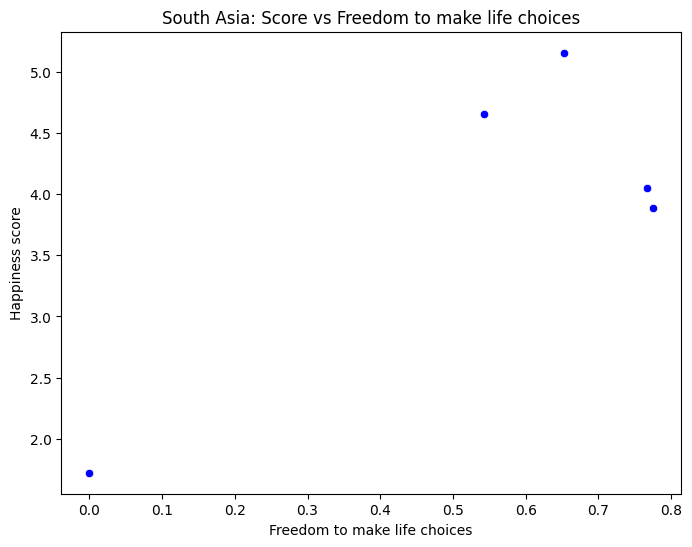

In [ ]:
# Scatter plot for South Asia - Score vs Freedom to Make Life Choices
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Freedom to make life choices", y="score", data=south_asia_data, color="blue")
plt.title("South Asia: Score vs Freedom to make life choices")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness score")
plt.show()


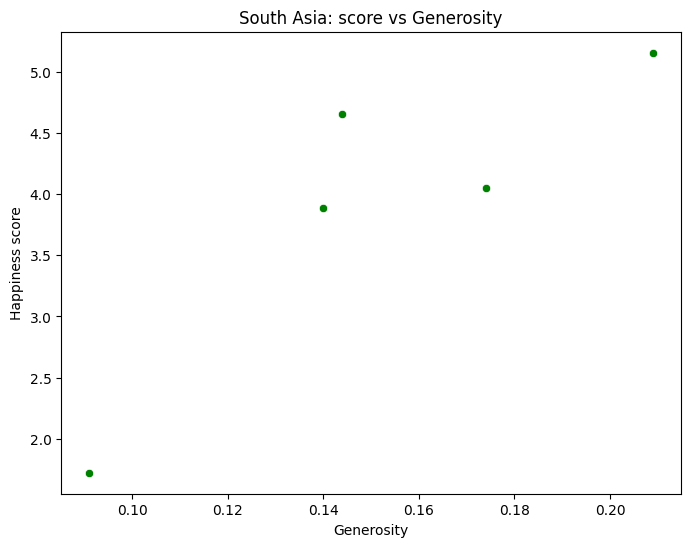

In [ ]:
# Scatter plot for South Asia - Score vs Generosity
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Generosity", y="score", data=south_asia_data, color="green")
plt.title("South Asia: score vs Generosity")
plt.xlabel("Generosity")
plt.ylabel("Happiness score")
plt.show()


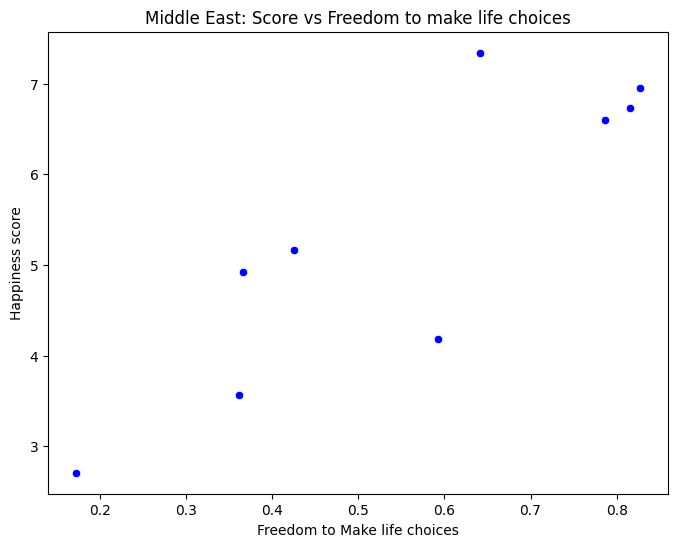

In [ ]:
# Scatter plot for Middle East - Score vs Freedom to Make Life Choices
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Freedom to make life choices", y="score", data=middle_east_data, color="blue")
plt.title("Middle East: Score vs Freedom to make life choices")
plt.xlabel("Freedom to Make life choices")
plt.ylabel("Happiness score")
plt.show()


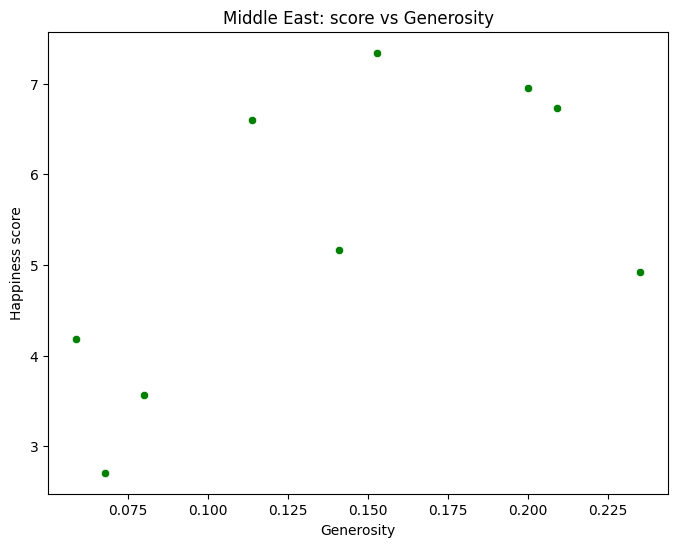

In [ ]:
# Scatter plot for Middle East - Score vs Generosity
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Generosity", y="score", data=middle_east_data, color="green")
plt.title("Middle East: score vs Generosity")
plt.xlabel("Generosity")
plt.ylabel("Happiness score")
plt.show()

In [ ]:
# Calculate IQR for Score and GDP per Capita in South Asia
south_asia_score_q1 = south_asia_data["score"].quantile(0.25)
south_asia_score_q3 = south_asia_data["score"].quantile(0.75)
south_asia_score_iqr = south_asia_score_q3 - south_asia_score_q1

south_asia_gdp_q1 = south_asia_data["Log GDP per capita"].quantile(0.25)
south_asia_gdp_q3 = south_asia_data["Log GDP per capita"].quantile(0.75)
south_asia_gdp_iqr = south_asia_gdp_q3 - south_asia_gdp_q1

# Outlier thresholds for Score and GDP per Capita in South Asia
south_asia_score_lower_bound = south_asia_score_q1 - 1.5 * south_asia_score_iqr
south_asia_score_upper_bound = south_asia_score_q3 + 1.5 * south_asia_score_iqr

south_asia_gdp_lower_bound = south_asia_gdp_q1 - 1.5 * south_asia_gdp_iqr
south_asia_gdp_upper_bound = south_asia_gdp_q3 + 1.5 * south_asia_gdp_iqr

# Identify outliers in Score and GDP per Capita
south_asia_score_outliers = south_asia_data[
    (south_asia_data["score"] < south_asia_score_lower_bound) |
    (south_asia_data["score"] > south_asia_score_upper_bound)
]

south_asia_gdp_outliers = south_asia_data[
    (south_asia_data["Log GDP per capita"] < south_asia_gdp_lower_bound) |
    (south_asia_data["Log GDP per capita"] > south_asia_gdp_upper_bound)
]

print(f"South Asia - Score Outliers: \n{south_asia_score_outliers[['Country name', 'score']]}")
print(f"South Asia - Log GDP per capita Outliers: \n{south_asia_gdp_outliers[['Country name', 'Log GDP per capita']]}")


South Asia - Score Outliers: 
    Country name  score
142  Afghanistan  1.721
South Asia - Log GDP per capita Outliers: 
    Country name  Log GDP per capita
142  Afghanistan               0.628


In [ ]:
# Calculate IQR for Score and GDP per Capita in Middle East
middle_east_score_q1 = middle_east_data["score"].quantile(0.25)
middle_east_score_q3 = middle_east_data["score"].quantile(0.75)
middle_east_score_iqr = middle_east_score_q3 - middle_east_score_q1

middle_east_gdp_q1 = middle_east_data["Log GDP per capita"].quantile(0.25)
middle_east_gdp_q3 = middle_east_data["Log GDP per capita"].quantile(0.75)
middle_east_gdp_iqr = middle_east_gdp_q3 - middle_east_gdp_q1

# Outlier thresholds for Score and GDP per Capita in Middle East
middle_east_score_lower_bound = middle_east_score_q1 - 1.5 * middle_east_score_iqr
middle_east_score_upper_bound = middle_east_score_q3 + 1.5 * middle_east_score_iqr

middle_east_gdp_lower_bound = middle_east_gdp_q1 - 1.5 * middle_east_gdp_iqr
middle_east_gdp_upper_bound = middle_east_gdp_q3 + 1.5 * middle_east_gdp_iqr

# Identify outliers in Score and GDP per Capita
middle_east_score_outliers = middle_east_data[
    (middle_east_data["score"] < middle_east_score_lower_bound) |
    (middle_east_data["score"] > middle_east_score_upper_bound)
]

middle_east_gdp_outliers = middle_east_data[
    (middle_east_data["Log GDP per capita"] < middle_east_gdp_lower_bound) |
    (middle_east_data["Log GDP per capita"] > middle_east_gdp_upper_bound)
]

print(f"Middle East - Score Outliers: \n{middle_east_score_outliers[['Country name', 'score']]}")
print(f"Middle East - Log GDP per capita Outliers: \n{middle_east_gdp_outliers[['Country name', 'Log GDP per capita']]}")


Middle East - Score Outliers: 
Empty DataFrame
Columns: [Country name, score]
Index: []
Middle East - Log GDP per capita Outliers: 
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


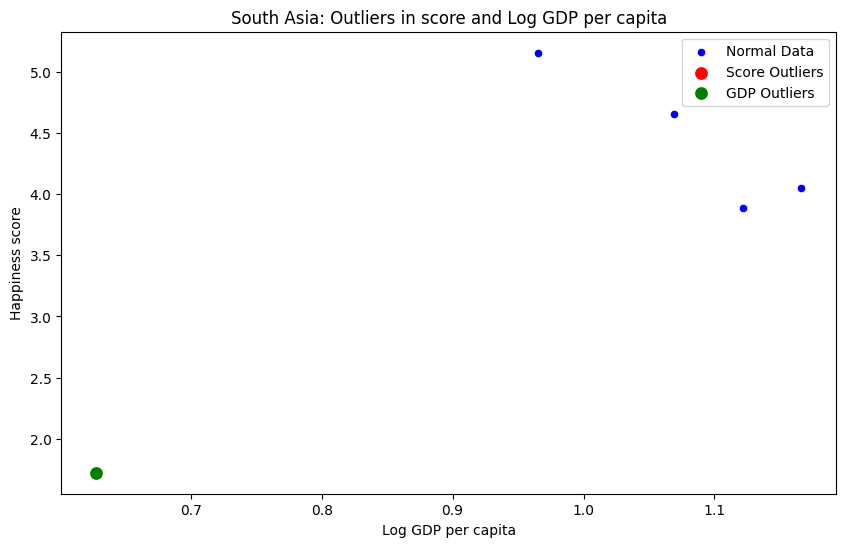

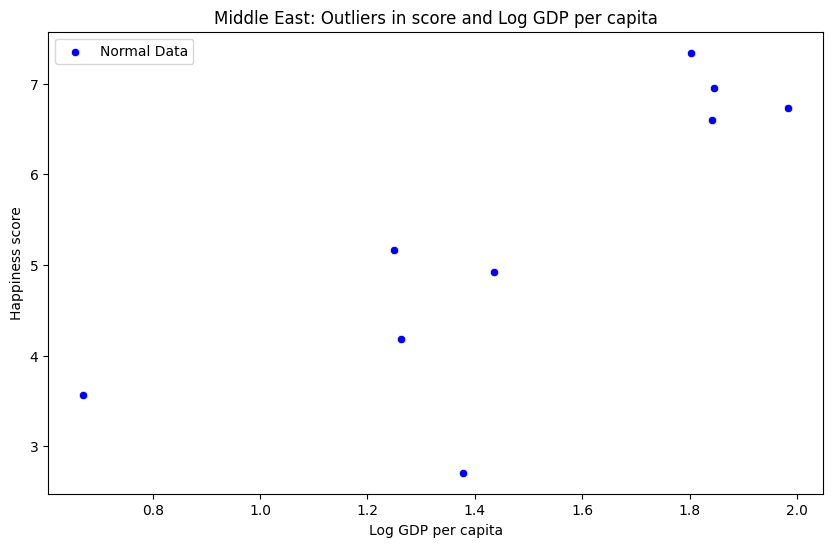

In [ ]:
# Scatter Plot for South Asia: GDP vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Log GDP per capita", y="score", data=south_asia_data, label="Normal Data", color="blue")
sns.scatterplot(x=south_asia_score_outliers["Log GDP per capita"],
                y=south_asia_score_outliers["score"],
                label="Score Outliers", color="red", s=100)
sns.scatterplot(x=south_asia_gdp_outliers["Log GDP per capita"],
                y=south_asia_gdp_outliers["score"],
                label="GDP Outliers", color="green", s=100)
plt.title("South Asia: Outliers in score and Log GDP per capita")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness score")
plt.legend()
plt.show()

# Scatter Plot for Middle East: GDP vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Log GDP per capita", y="score", data=middle_east_data, label="Normal Data", color="blue")
sns.scatterplot(x=middle_east_score_outliers["Log GDP per capita"],
                y=middle_east_score_outliers["score"],
                label="Score Outliers", color="red", s=100)
sns.scatterplot(x=middle_east_gdp_outliers["Log GDP per capita"],
                y=middle_east_gdp_outliers["score"],
                label="Log GDP Outliers", color="green", s=100)
plt.title("Middle East: Outliers in score and Log GDP per capita")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness score")
plt.legend()
plt.show()


<ipython-input-71-7d1b1cde6e0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_data["Region"] = "Middle East"
<ipython-input-71-7d1b1cde6e0f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="score", data=combined_data, palette="Set2")


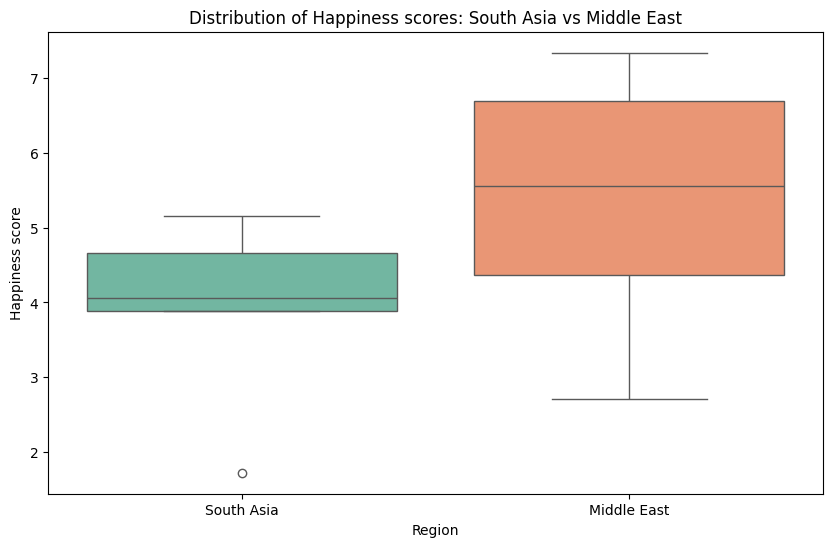

In [ ]:
# Combine both datasets (South Asia and Middle East) into a single DataFrame for comparison
south_asia_data["Region"] = "South Asia"
middle_east_data["Region"] = "Middle East"

# Concatenate both DataFrames
combined_data = pd.concat([south_asia_data[["Country name", "score", "Region"]],
                           middle_east_data[["Country name", "score", "Region"]]])

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Region", y="score", data=combined_data, palette="Set2")
plt.title("Distribution of Happiness scores: South Asia vs Middle East")
plt.xlabel("Region")
plt.ylabel("Happiness score")
plt.show()
